In [1]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/chloe/Downloads/new_customer_booking.csv", index_col=0)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,NaN,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,NaN,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,NaN,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,NaN,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,NaN,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,NaN,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,NaN,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,NaN,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,NaN,PERPNH,Australia,1,0,1,5.62,0


In [5]:
df_final = df

In [6]:
from sklearn.preprocessing import OneHotEncoder

#create instance for one hot encoder

encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode sales channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0: 'Internet', 1: 'Mobile'})
df_final = df_final.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0: 'RoundTrip', 1: 'Oneway', 2: 'CircleTrip'})
df_final = df_final.join(encoder_df)

In [7]:
#drop categorical columns now
df_final.drop(['sales_channel', 'trip_type','booking_origin', 'route'], axis=1, inplace = True)

In [8]:
#store the label for supervised learning
label = df['booking_complete']

In [9]:
df_final = df_final.drop('booking_complete', axis=1)

In [10]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,Oneway,CircleTrip
0,2,262,19,7,NaN,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,NaN,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,NaN,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,NaN,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,NaN,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,NaN,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,NaN,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,NaN,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,NaN,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


# Normalizing the values

In [11]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [12]:
#create a df of scaled data

scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [13]:
#add the labels back to the dataframe

scaled_df['label']  = label

In [14]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,Oneway,CircleTrip,label
0,0.400769,1.971093,-0.119401,-0.381588,NaN,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,NaN,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,NaN,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,NaN,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,NaN,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,NaN,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,NaN,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,NaN,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,NaN,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


# Correlation matrix

<Axes: >

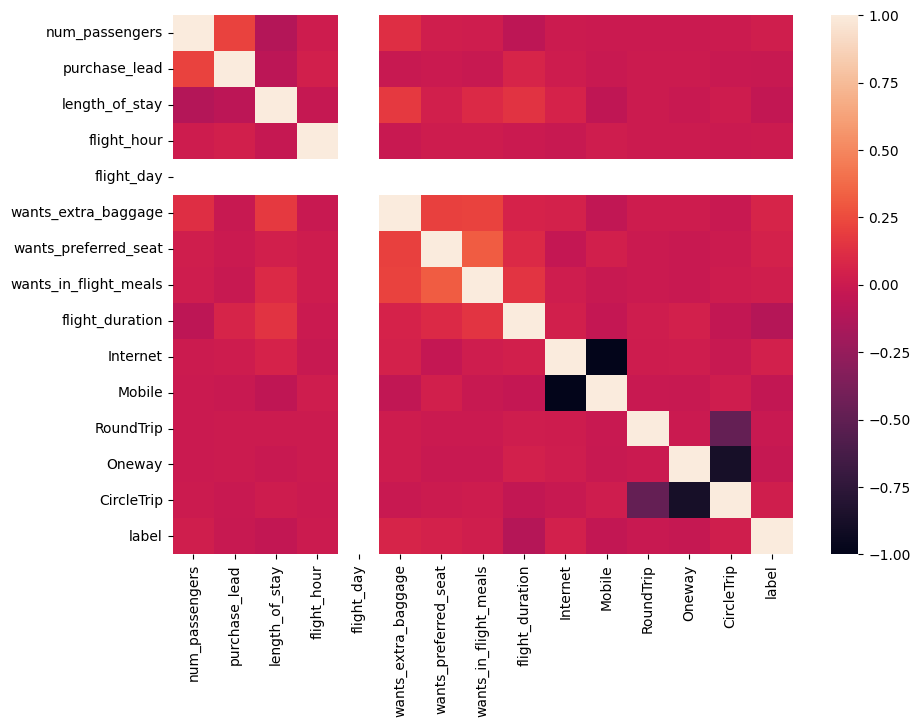

In [15]:
corr = scaled_df.corr()

plt.figure(figsize=(10,7))

#plot the heatmap
sns.heatmap(corr)

# Splitting train and test data

In [16]:
from sklearn.model_selection import train_test_split

X = scaled_df.iloc[:,:-1]
y = scaled_df['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV,  RepeatedStratifiedKFold

Create functions to fit and predict the values of whether customer would complete the booking.
Also functions with metrics to evaluate the model prediction.

In [18]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return accuracy_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

# Random forest classifier

In [19]:
#Create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

### Checking training accuracy

In [20]:
y_pred_train = model_fit_predict(clf_rf, X_train, y_train, X_train)
set(y_pred_train)

#F1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#Accuracy score for training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#Precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")


Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.7 respectively


0.9298486932599724

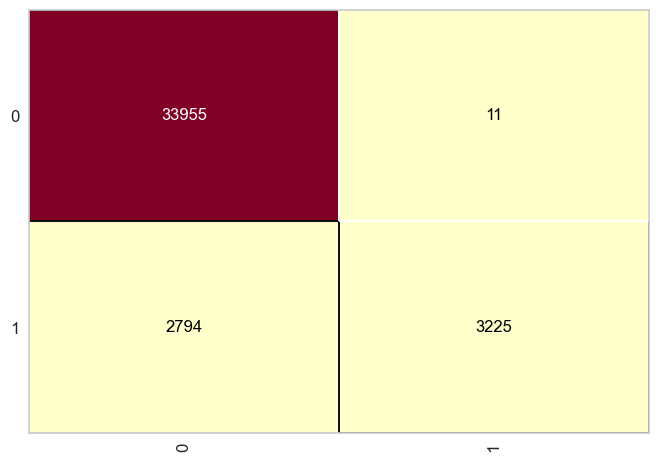

In [21]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_train, y_train)

### Checking testing accuracy

In [22]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)

y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.85, 0.41 and 0.09 respectively


0.8507552265679704

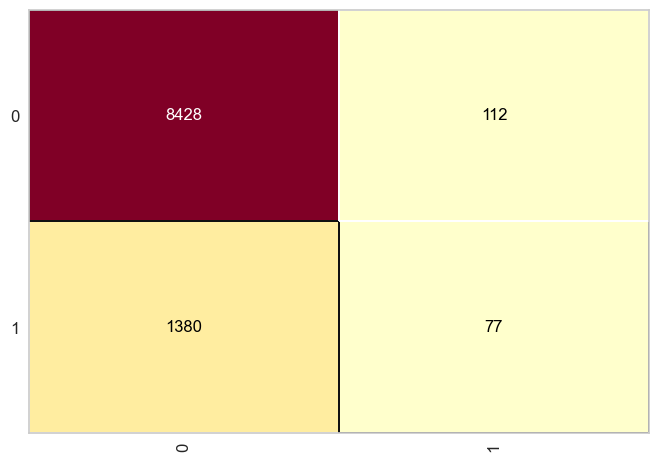

In [23]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

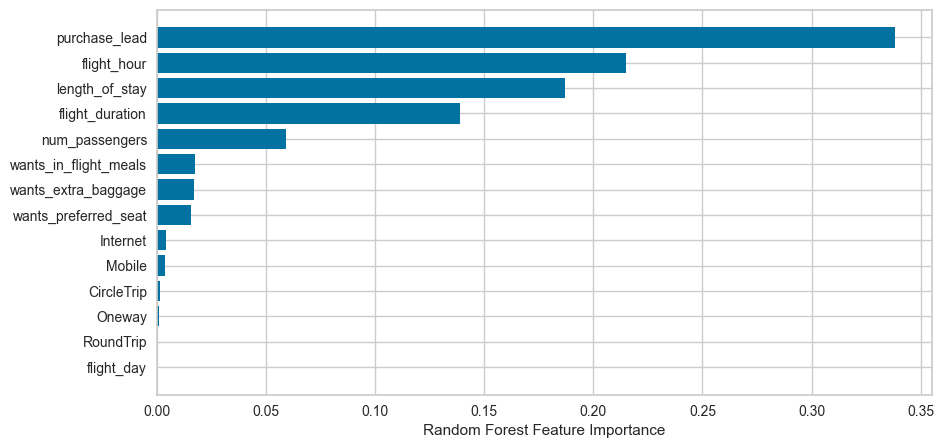

In [24]:
plt.figure(figsize=(10,5))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

### Balancing the dataset

In [25]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [26]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [27]:
#concatenate the two dataframes, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [28]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [29]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,Oneway,CircleTrip,label
0,0.400769,-0.653393,-0.532474,1.465988,NaN,-1.421288,-0.650054,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,-0.230806,0.441199,-1.490134,NaN,-1.421288,-0.650054,1.158002,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,-0.579424,2.549369,-0.089895,0.172685,NaN,0.703587,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
3,0.400769,1.226006,-0.561979,-1.490134,NaN,0.703587,-0.650054,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,-0.579424,2.538249,0.205157,2.205019,NaN,0.703587,-0.650054,-0.863557,0.870293,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,1.380962,1.837644,0.205157,2.574534,NaN,0.703587,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15472,-0.579424,-0.775721,-0.620990,-0.935861,NaN,-1.421288,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15473,-0.579424,0.647729,-0.001380,-0.381588,NaN,-1.421288,1.538334,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.853566,-0.532474,-0.751103,NaN,-1.421288,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [30]:
X = scaled_df_new.iloc[:,:-1]
y = scaled_df_new['label']

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [31]:
#create an instance of the classifier and fit the training data
clf_rf = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

In [32]:
y_pred_test = model_fit_predict(clf_rf, X_train, y_train, X_test)

#f1 score for test data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for test data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for test data
pre = round(precision_score(y_test, y_pred_test),2)

recall = round(recall_score(y_test, y_pred_test),2)

specificity = round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, precision, recall and f1-score for test data are {acc}, {pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, precision, recall and f1-score for test data are 0.62, 0.61, 0.58, 0.65 and 0.6 respectively


0.6198320413436692

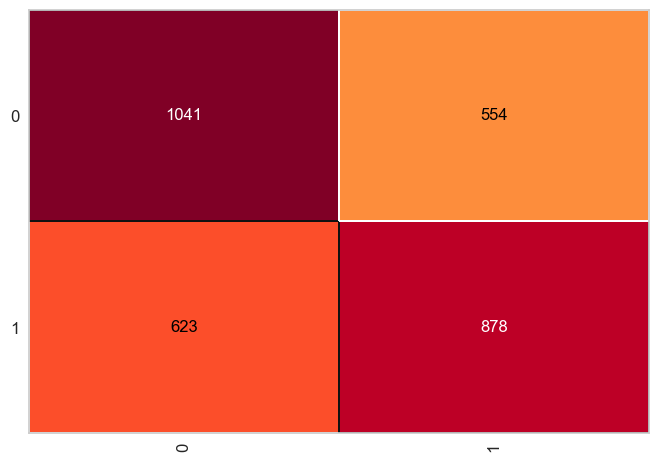

In [33]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(X_train, y_train)

cm.score(X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

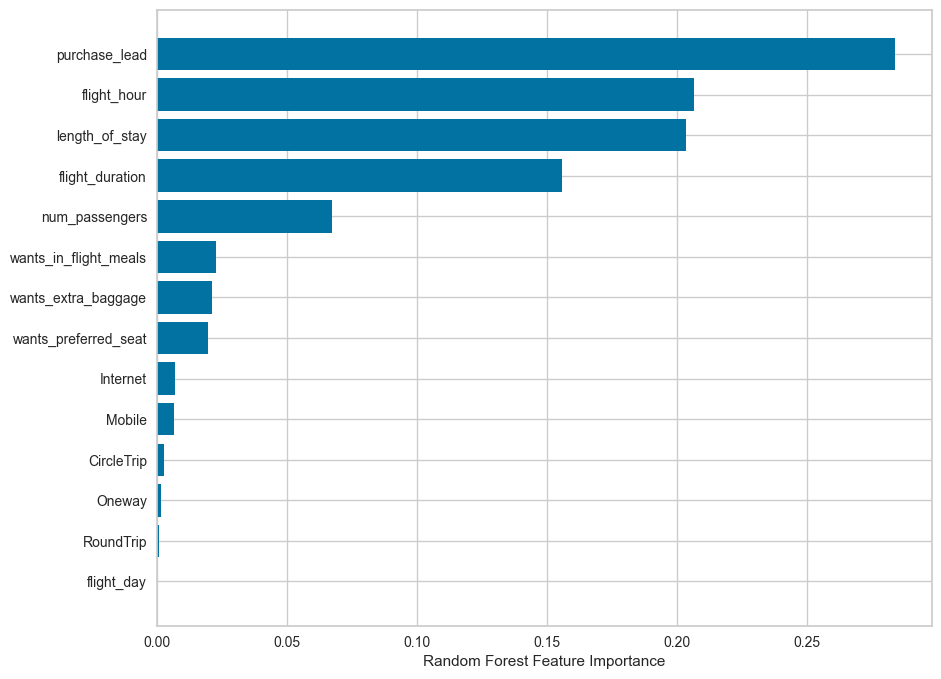

In [34]:
plt.figure(figsize=(10,8))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [36]:
from sklearn.metrics import roc_auc_score, average_precision_score
y_proba_test = clf_rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba_test)
ap  = average_precision_score(y_test, y_proba_test)
print(f"Test — AUC {auc:.2f} · PR-AUC {ap:.2f}")

Test — AUC 0.66 · PR-AUC 0.64
